In [118]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split    
import matplotlib.pyplot as plt

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target
X, y


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [119]:
y = pd.get_dummies(y, dtype=int).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120, 3), (30, 3))

In [121]:
learning_rate = 0.3
iterations = 1000
N = y_train.size
input_size = 4
hidden_size = 3
output_size = 3
results = pd.DataFrame(columns=['mse', 'accuracy'])
# results

In [122]:
W1 = np.random.normal(size=(input_size, hidden_size))
W2 = np.random.normal(size=(hidden_size, output_size))   

In [123]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [124]:
for itr in range(iterations):    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

/var/folders/_k/n26h1g0x3tnf4l1ykcx1d40r0000gn/T/ipykernel_35418/3703968233.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)


In [125]:
results

,mse,accuracy
0,0.149170,0.308333
1,0.148616,0.308333
2,0.148058,0.308333
3,0.147498,0.308333
4,0.146934,0.308333
...,...,...
995,0.069672,0.691667
996,0.069658,0.691667
997,0.069643,0.691667
998,0.069629,0.691667


<Axes: title={'center': 'Mean Squared Error'}>

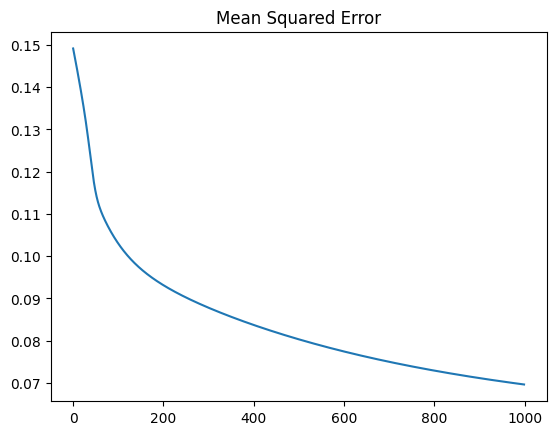

In [126]:
results.mse.plot(title='Mean Squared Error')

<Axes: title={'center': 'Accuracy'}>

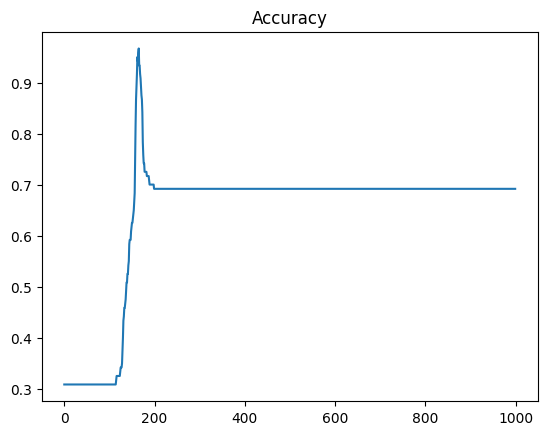

In [127]:
results.accuracy.plot(title='Accuracy')